In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [34]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Univariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

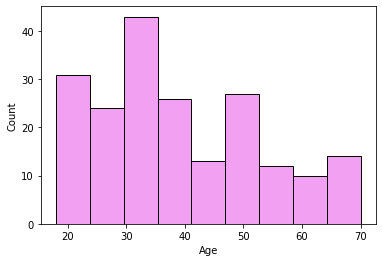

In [35]:
sns.histplot(df['Age'], color="Violet")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

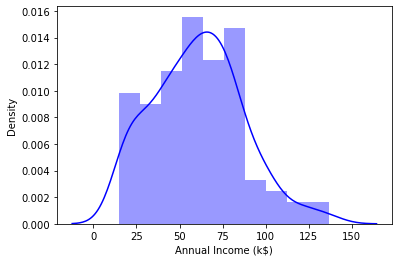

In [36]:
sns.distplot(df['Annual Income (k$)'], color="Blue")

# Bi-variate Analysis

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

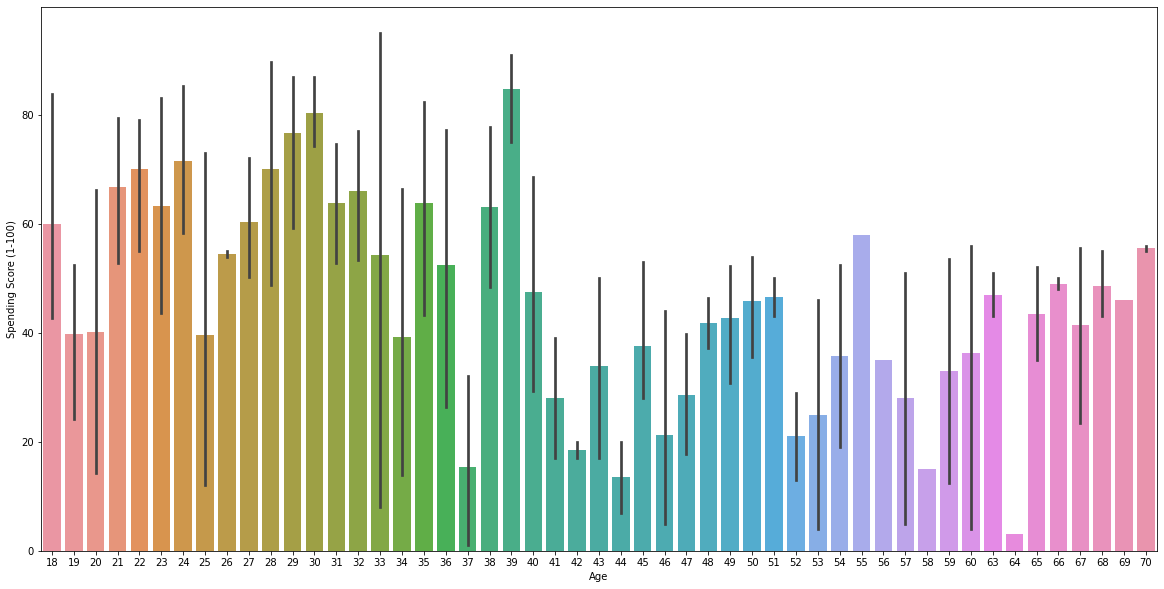

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(df['Age'],df['Spending Score (1-100)'])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

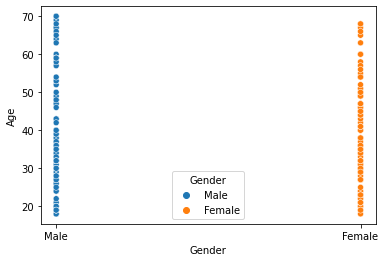

In [38]:
sns.scatterplot(df['Gender'], df['Age'], hue = df['Gender'])

# Multi -Variate Analysis

<AxesSubplot:>

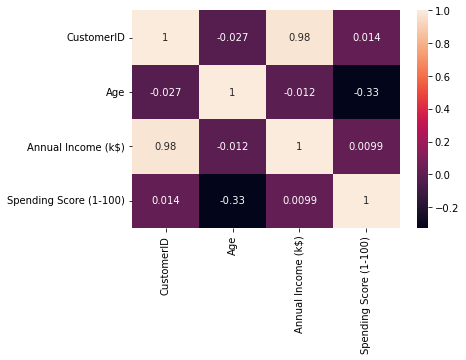

In [39]:
sns.heatmap(df.corr(),annot=True)

# Performing Descriptive Stats on the Dataset

In [40]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [41]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [42]:
df.shape

(200, 5)

# Checking for null values

In [43]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [44]:
df.drop('CustomerID',axis=1,inplace=True)
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Finding the outliers and replacing them

In [47]:
for i in df:
    if df[i].dtype=='int64':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])

# Checking for categorical columns and performing encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
length = LabelEncoder()
df['Gender'] = length.fit_transform(df['Gender'])
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


# Scaling the data

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

# Performing any of the clustering algorithms

In [51]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(df_scaled)
res

array([6, 6, 4, 4, 4, 4, 0, 4, 5, 4, 5, 4, 0, 4, 1, 6, 4, 6, 5, 4, 6, 6,
       0, 6, 0, 6, 0, 6, 0, 4, 5, 4, 5, 6, 0, 4, 0, 4, 0, 4, 0, 6, 5, 4,
       0, 4, 0, 4, 4, 4, 0, 6, 4, 5, 0, 5, 0, 5, 4, 5, 5, 6, 0, 0, 5, 6,
       0, 0, 6, 4, 5, 0, 0, 0, 5, 6, 0, 6, 4, 0, 5, 6, 5, 0, 4, 5, 0, 4,
       4, 0, 0, 6, 5, 0, 4, 6, 0, 4, 5, 6, 4, 0, 5, 6, 5, 4, 0, 5, 5, 5,
       5, 4, 0, 6, 4, 4, 0, 0, 0, 0, 6, 0, 3, 2, 4, 3, 1, 2, 5, 2, 1, 2,
       4, 3, 1, 3, 7, 2, 1, 3, 7, 2, 4, 3, 1, 2, 1, 3, 7, 2, 1, 2, 7, 3,
       7, 3, 1, 3, 1, 3, 7, 3, 1, 3, 1, 3, 1, 3, 7, 2, 1, 2, 1, 2, 7, 3,
       1, 2, 1, 2, 7, 3, 1, 3, 7, 2, 7, 2, 7, 3, 7, 3, 1, 3, 7, 3, 7, 2,
       1, 2])

In [52]:
df1 = pd.DataFrame(df_scaled, columns = df.columns)
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [61]:
df1['Mall_Clu']  = pd.Series(res)
df1.drop('kclus', inplace=True, axis=1)
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Mall_Clu
0,1.0,0.019231,0.000000,0.387755,6
1,1.0,0.057692,0.000000,0.816327,6
2,0.0,0.038462,0.008493,0.051020,4
3,0.0,0.096154,0.008493,0.775510,4
4,0.0,0.250000,0.016985,0.397959,4


In [55]:
df1['Mall_Clu'].unique()

array([6, 4, 0, 5, 1, 3, 2, 7])

In [56]:
df1['Mall_Clu'].value_counts()

0    38
4    37
5    26
6    24
3    22
1    20
2    18
7    15
Name: Mall_Clu, dtype: int64

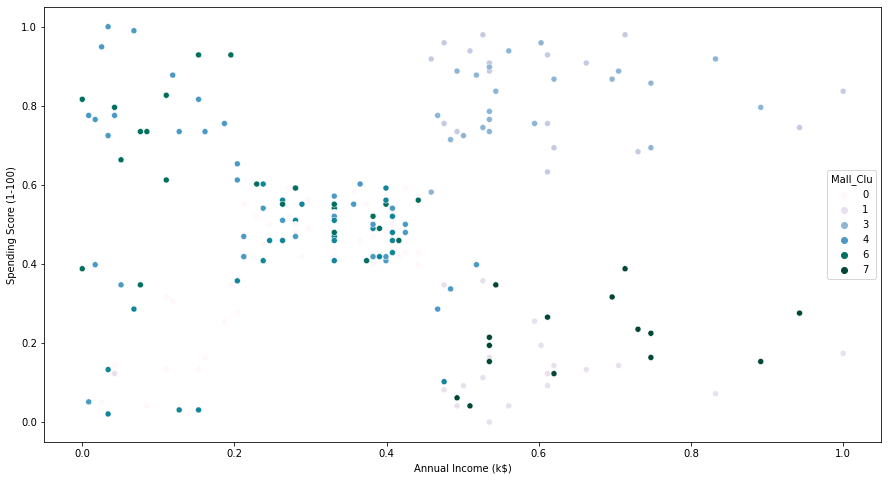

In [57]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=df1['Annual Income (k$)'],
                y=df1['Spending Score (1-100)'],
                hue=df1['Mall_Clu'],
                palette='PuBuGn')
plt.show()

In [58]:
ind = df1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [62]:
dep = df1.iloc[:,4:]
dep.head()

,Mall_Clu
0,6
1,6
2,4
3,4
4,4


# Splitting dataset into train and test data

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [66]:
x_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[3.33176789],
       [1.78786794],
       [2.55006404],
       [2.66362097],
       [2.37422392]])

# Measuring the performance using metrics

In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("Mean squared error: ", mse)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("Mean absolute error: ", mae)
acc = lr.score(x_test,y_test)
print("Accuracy: ", acc)

Mean squared error:  4.940274636361325
Root mean squared error:  2.2226728586009514
Mean absolute error:  1.8505414166940437
Accuracy:  -0.023537562782042443
